<a href="https://colab.research.google.com/github/aryan-at-ul/pytorch_tutorials/blob/main/MNIST_classification_suing_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import torch
import torchvision 
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np 
from torchvision import datasets, transforms 
import torch.nn.functional as F

In [20]:
transform = transforms.Compose([
    transforms.Resize((28,28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,) ,(0.5,))
]
)


training_dataset = datasets.MNIST(root = './data',download = True, train = True, transform= transform)
validation_dataset = datasets.MNIST(root = './data',download = True, train = False, transform = transform)

training_loader = torch.utils.data.DataLoader(dataset = training_dataset, batch_size = 100, shuffle = True)
validation_loader = torch.utils.data.DataLoader(dataset= validation_dataset, batch_size=100, shuffle = False)

In [21]:
def convert_img(tensor):
    img = tensor.clone().detach().numpy()
    # print(img.shape)
    img = img.transpose(1,2,0)
    # print(img.shape)
    img = img * np.array((0.5,0.5,0.5)) + np.array((0.5,0.5,0.5))
    img = img.clip(0,1)
    return img

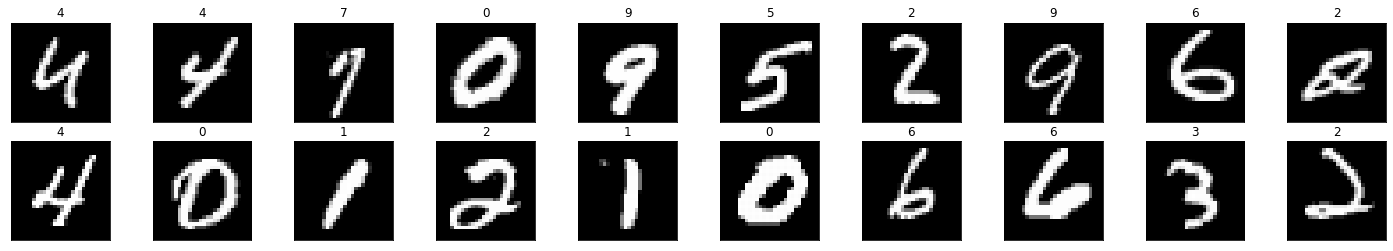

In [22]:
dataiter = iter(training_loader)
images, label = dataiter.next()
fig = plt.figure(figsize = (25,4))

for idx in np.arange(20):
    ax = fig.add_subplot(2,10,idx + 1,xticks = [], yticks = [])
    plt.imshow(convert_img(images[idx]))
    ax.set_title(label[idx].item())

In [30]:
class Classifier(nn.Module):
    def __init__(self,input,h1,h2,output):
        super().__init__()
        self.layer1 = nn.Linear(input,h1)
        self.layer2 = nn.Linear(h1,h2)
        self.layer3 = nn.Linear(h2,output)

    def forward(self,x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.layer3(x)
        return x


In [31]:
model = Classifier(784,125,65,10)
print(model)

Classifier(
  (layer1): Linear(in_features=784, out_features=125, bias=True)
  (layer2): Linear(in_features=125, out_features=65, bias=True)
  (layer3): Linear(in_features=65, out_features=10, bias=True)
)


In [32]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [33]:
epochs = 15
training_loss = []
training_accuracy = []
validation_loss = []
validation_accuracy = []

for i in range(epochs):
    training_epoch_loss = 0.0
    training_epoch_accuracy = 0.0
    validation_epoch_loss = 0.0
    validation_epoch_accuracy = 0.0

    for inputs,labels in training_loader:
        # print(inputs.shape)
        inputs = inputs.view(inputs.shape[0],-1)
        outputs = model.forward(inputs)
        loss = criterion(outputs,labels) #alwaus preds first then actual value
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _,preds = torch.max(outputs,1)
        training_epoch_loss += loss.item()
        training_epoch_accuracy += torch.sum(preds == labels.data)

    else:
        with torch.no_grad():
            for val_inputs,val_labels in validation_loader:
                val_inputs = val_inputs.view(val_inputs.shape[0],-1)
                val_outputs = model.forward(val_inputs)
                val_loss = criterion(val_outputs, val_labels)
                _,val_preds = torch.max(val_outputs,1)
                validation_epoch_loss += val_loss.item()
                validation_epoch_accuracy += torch.sum(val_preds == val_labels.data)

    training_accuracy.append(training_epoch_accuracy / len(training_loader))
    training_loss.append(training_epoch_loss / len(training_loader))

    valacc = validation_epoch_accuracy.float() / len(validation_loader)
    validation_accuracy.append(valacc)
    validation_loss.append(validation_epoch_loss / len(validation_loader))

    print(f"for epoch {i+1}  trainign loss is {training_epoch_loss/len(training_loader)} and validation loss {validation_epoch_loss/len(validation_loader)}")
    print(f"for epoch {i+1} training accuracy is {training_epoch_accuracy/len(training_loader)} and validation accuracy {valacc}")


for epoch 1  trainign loss is 0.4368867786725362 and validation loss 0.23583825245499612
for epoch 1 training accuracy is 87.30833435058594 and validation accuracy 92.81999969482422
for epoch 2  trainign loss is 0.20798664638151726 and validation loss 0.16212770082987846
for epoch 2 training accuracy is 93.82333374023438 and validation accuracy 95.08999633789062
for epoch 3  trainign loss is 0.15490692554041743 and validation loss 0.1542275289213285
for epoch 3 training accuracy is 95.288330078125 and validation accuracy 94.98999786376953
for epoch 4  trainign loss is 0.1260548588509361 and validation loss 0.11653744662995451
for epoch 4 training accuracy is 96.13833618164062 and validation accuracy 96.25
for epoch 5  trainign loss is 0.10320693065722783 and validation loss 0.10920268089161254
for epoch 5 training accuracy is 96.8133316040039 and validation accuracy 96.5999984741211
for epoch 6  trainign loss is 0.09077269161585719 and validation loss 0.12063425375265069
for epoch 6 tr

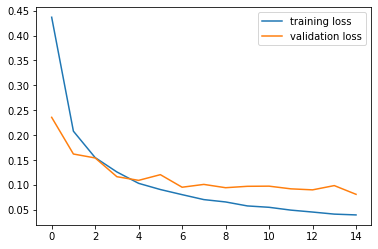

In [36]:
plt.plot(training_loss,label = 'training loss')
plt.plot(validation_loss,label = 'validation loss')
plt.legend()

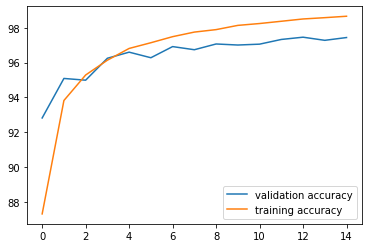

In [38]:
plt.plot(validation_accuracy,label = 'validation accuracy')
plt.plot(training_accuracy,label = 'training accuracy')
plt.legend()

torch.Size([100, 1, 28, 28])
torch.Size([100, 784])


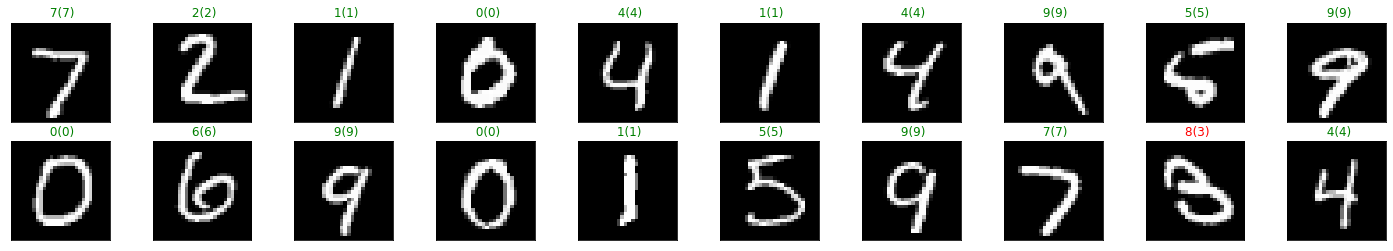

In [47]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
print(images.shape)
images_ = images.view(images.shape[0],-1)
print(images_.shape)
output = model.forward(images_)
_,preds = torch.max(output,1)

fig = plt.figure(figsize = (25,4))

for i in np.arange(20):
    ax = fig.add_subplot(2,10,i+1,xticks =[], yticks = [])
    plt.imshow(convert_img(images[i]))
    ax.set_title(f" {preds[i].item()}({labels[i].item()})", color = ('green' if preds[i] == labels[i] else "red"))